#### About Dataset :--
* Dataset is downloaded from IEEE dataport.
* There are 10 classes in the dataset which contain 10 types of eye disease.
** Diabetic Retinopathy :- It is an eye disease that can cause vision loss and blindness in people who have diabetes and  it affects the blood vessels in the retina.
** Glaucoma Positive :- Glaucoma is an eye disease that damage the optic nerve and optic nerve supplies visual information from eye to brain.
** Glaucoma Negative
** Maculopathy :- It is a disease that affects the back of the retina, called the macula. The macula controls the ability to read, see fine detail in objects and recognize faces and colors.
** Large Optic Cup :- Optic cup is the white, cup-like area in the center of the optic disc.
** Blindness
** Blur Fundus
** BRVO :- Branch Retinal Vein Occlusion is a blockage of one or more branches of the central retinal vein, which runs through the optic nerve.
** Pathological Myopia :- Pathological myopia is an extremely high amount of nearsightedness that causes a major alteration of the shape or globe of the eye, which may lead to profound vision loss.
** Rhegmatogenous RD :- Rhegmatogenous detachments are caused by a hole or tear in the retina that allows fluid to pass through and collect underneath the retina, pulling the retina away from underlying tissues. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

import tensorflow as tf
import keras
from keras.models import Model
from keras.layers import Flatten, Dense
from keras.applications.densenet import DenseNet121

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.densenet import preprocess_input

import warnings
warnings.filterwarnings("ignore")
print("Module and Packages imported successfully.....!")

Module and Packages imported successfully.....!


#### Loading Dataset

In [2]:
train_dir = "C:/Users/Ganpati Kumar Roy/Desktop/5 Ocular Disease/Training/"
val_dir = "C:/Users/Ganpati Kumar Roy/Desktop/5 Ocular Disease/Validation/"

#### Data Read 

In [3]:
def get_files(directory):
  if not os.path.exists(directory):
    return 0
  count=0
  for current_path,dirs,files in os.walk(directory):
    for dr in dirs:
      count+= len(glob.glob(os.path.join(current_path,dr+"/*")))
  return count    

In [4]:
train_samples =get_files(train_dir)
num_classes=len(glob.glob(train_dir+"/*"))
val_samples=get_files(val_dir) 
print("Classes are :- ", num_classes)
print("Total train images :-", train_samples)
print("Total validation images :-", val_samples)

Classes are :-  5
Total train images :- 5663
Total validation images :- 1397


#### Data Preprocessing

In [5]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, 
                                   horizontal_flip=True)

validation_datagen=ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split=0.2, 
                                   horizontal_flip=True)

In [6]:
img_width,img_height =256,256
input_shape=(img_width,img_height,3)
batch_size =32

train_generator =train_datagen.flow_from_directory(train_dir,
                                                   target_size=(img_width,img_height),
                                                   batch_size=batch_size)
validation_generator = validation_datagen.flow_from_directory(
                                                    val_dir, 
                                                    target_size=(img_height, img_width),
                                                    batch_size=batch_size) 

Found 5663 images belonging to 5 classes.
Found 1397 images belonging to 5 classes.


In [7]:
train_generator.class_indices

{'Blindness': 0,
 'Diabetic Retinopathy': 1,
 'Glaucoma': 2,
 'Normal': 3,
 'Other Disease-Blindness': 4}

#### DenseNet 121 Parameter Building

In [8]:
from keras.layers import BatchNormalization, Activation
densenet = DenseNet121(input_shape=(256,256,3), weights = 'imagenet', include_top = False)
for layer in densenet.layers:
    layer.trainable = False
    
x = Flatten()(densenet.output)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dense(num_classes, activation = 'softmax')(x)
model = Model(inputs = densenet.input, outputs = x)

model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 128, 128, 64) 9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1/conv[0][0]                 
_______________________________________________________________________________________

In [9]:
opt=keras.optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,loss='categorical_crossentropy',metrics=['accuracy'])
train=model.fit(train_generator,
                          epochs=10,
                          steps_per_epoch=train_generator.samples // batch_size,
                          validation_data=validation_generator,
                          validation_steps= validation_generator.samples // batch_size,
                          verbose=1)

Epoch 1/10
176/176 [==============================] - 1419s 8s/step - loss: 1.1790 - accuracy: 0.8274 - val_loss: 1.1203 - val_accuracy: 0.8438
Epoch 2/10
176/176 [==============================] - 1335s 8s/step - loss: 0.8068 - accuracy: 0.8942 - val_loss: 1.2306 - val_accuracy: 0.8721
Epoch 3/10
176/176 [==============================] - 1315s 7s/step - loss: 0.7104 - accuracy: 0.9132 - val_loss: 0.8861 - val_accuracy: 0.8983
Epoch 4/10
176/176 [==============================] - 1351s 8s/step - loss: 0.5452 - accuracy: 0.9299 - val_loss: 1.2000 - val_accuracy: 0.8772
Epoch 5/10
176/176 [==============================] - 1433s 8s/step - loss: 0.6901 - accuracy: 0.9240 - val_loss: 2.1733 - val_accuracy: 0.8706
Epoch 6/10
176/176 [==============================] - 1426s 8s/step - loss: 0.6596 - accuracy: 0.9309 - val_loss: 1.5123 - val_accuracy: 0.8554
Epoch 7/10
176/176 [==============================] - 1417s 8s/step - loss: 0.6574 - accuracy: 0.9302 - val_loss: 1.3850 - val_accuracy:

#### Model Saving

In [10]:
from tensorflow.keras.models import load_model
model.save('5-OD_DenseNet121.h5')

#### Accuracy Graph

In [11]:
train.history

{'loss': [1.1789640188217163,
  0.806839108467102,
  0.7103779911994934,
  0.54518723487854,
  0.6900942325592041,
  0.6596373319625854,
  0.6574419736862183,
  0.509813129901886,
  0.6064621806144714,
  0.4260554015636444],
 'accuracy': [0.8273841142654419,
  0.894157350063324,
  0.9131593108177185,
  0.9298526048660278,
  0.9239921569824219,
  0.9309181571006775,
  0.9302077889442444,
  0.9435269236564636,
  0.9362457990646362,
  0.9529390931129456],
 'val_loss': [1.1202701330184937,
  1.230554223060608,
  0.8860860466957092,
  1.1999759674072266,
  2.1732797622680664,
  1.5123170614242554,
  1.3849835395812988,
  1.211707353591919,
  1.1905349493026733,
  0.9872496128082275],
 'val_accuracy': [0.84375,
  0.8720930218696594,
  0.8982558250427246,
  0.8771802186965942,
  0.8706395626068115,
  0.8553779125213623,
  0.9084302186965942,
  0.9113371968269348,
  0.9149709343910217,
  0.9207848906517029]}

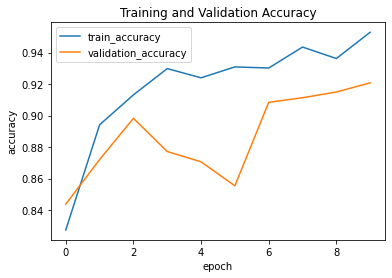

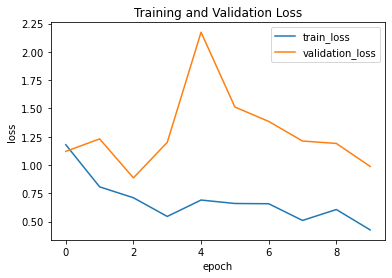

In [12]:
def plot_accuracy(train,title):
    plt.title(title)
    plt.plot(train.history['accuracy']) 
    plt.plot(train.history['val_accuracy']) 
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'validation_accuracy'], loc='best')
    plt.show()
    
def plot_loss(train,title):
    plt.title(title)
    plt.plot(train.history['loss'])
    plt.plot(train.history['val_loss'])
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'validation_loss'], loc='best')
    plt.show()

    
plot_accuracy(train,'Training and Validation Accuracy')
plot_loss(train,'Training and Validation Loss')

#### Confusion Matrix

##### Training :-

In [13]:
train_generator.reset()
predictions = model.predict_generator(generator = train_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = train_generator.classes

Instructions for updating:
Please use Model.predict, which supports generators.


In [14]:
labels_map = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels_map.items())
predict = [labels[k] for k in y_pred]

filenames = train_generator.filenames
results = pd.DataFrame({"Filename":filenames,"Predictions":predict})

In [15]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y,predict_y):
    c = confusion_matrix(test_y, predict_y)
    cmap = sns.light_palette("blue")
    plt.figure(figsize=(10,4))
    sns.heatmap(c, annot = True, cmap=cmap, fmt=".1f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

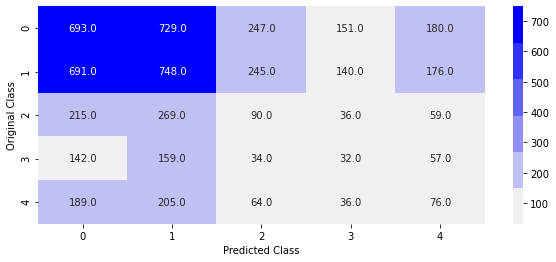

In [16]:
import seaborn as sns
plot_confusion_matrix(y_test, y_pred) 

##### Validation :-

In [17]:
validation_generator.reset()
predictions = model.predict_generator(generator = validation_generator)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = validation_generator.classes

In [18]:
labels_map = (train_generator.class_indices)
labels = dict((v,k) for k,v in labels_map.items())
predict = [labels[k] for k in y_pred]

filenames = validation_generator.filenames
results = pd.DataFrame({"Filename":filenames,"Predictions":predict})

In [19]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(test_y,predict_y):
    c = confusion_matrix(test_y, predict_y)
    cmap = sns.light_palette("blue")
    plt.figure(figsize=(10,4))
    sns.heatmap(c, annot = True, cmap=cmap, fmt=".1f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()

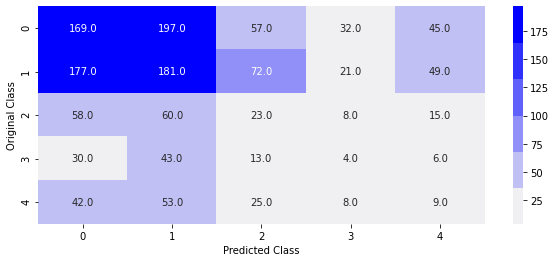

In [20]:
import seaborn as sns
plot_confusion_matrix(y_test, y_pred) 